# Importacion de librerias

In [69]:
#%pip install numpy
# %pip install pandas
# $pip install matplotlib
# %pip install Pillow
# %pip install tqdm
# %pip install collections
# %pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.4 MB/s  0:00:05 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 8.9 MB/s  0:00:02 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [16]:
import sys
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from collections import Counter

## Configuracion

In [32]:
CSV_PATH = "../data/csv/images_labels.csv"

# Cargar los datos

In [ ]:
print("Current working directory:", os.getcwd())
df = pd.read_csv(CSV_PATH)
df.head()

Current working directory: /Users/ra/Library/CloudStorage/GoogleDrive-ricardoaarango@gmail.com/My Drive/Educacion/U de los Andes/MAIA/IV/Proyecto - Desarrollo de Soluciones/maia_proyecto_desarrollo_soluciones/jupyter


,image_path,class
0,data/images/Normal4.png,Normal
1,data/images/HH8.png,HH
2,data/images/HH9.png,HH
3,data/images/HH.png,HH
4,data/images/HH2.png,HH


## Descripción general del dataset

In [35]:
print("Total imágenes:", len(df))
print("\nClases:", df["class"].unique())
print("\nImágenes por clase:")
print(df["class"].value_counts())

Total imágenes: 20

Clases: <StringArray>
['Normal', 'HH']
Length: 2, dtype: str

Imágenes por clase:
class
HH        15
Normal     5
Name: count, dtype: int64


## Distribucion de clases

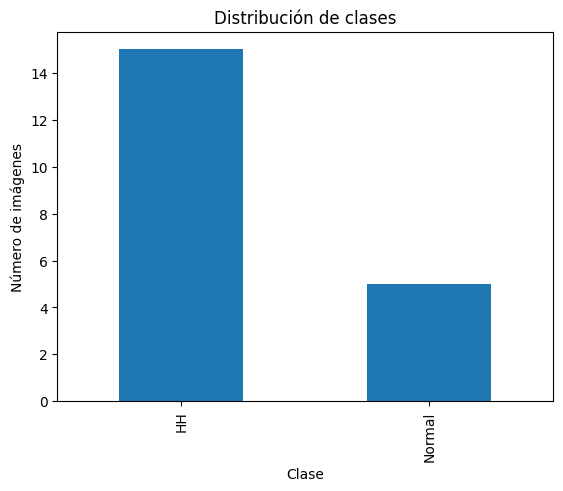

In [36]:
plt.figure()
df["class"].value_counts().plot(kind="bar")
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Número de imágenes")
plt.show()

## Estadisticas de dimensiones

In [44]:
data_info = []

for path in tqdm(df["image_path"]):
    path = "../" + path  # Ajustar el path si es necesario
    try:
        with Image.open(path) as img:
            width, height = img.size
            size_kb = os.path.getsize(path) / 1024
            channels = len(img.getbands())
            
            data_info.append((width, height, size_kb, channels))
    except:
        print (path)
        data_info.append((None, None, None, None))

df[["width", "height", "size_kb", "channels"]] = pd.DataFrame(data_info)

df.head()

print("Resolución promedio:")
print("Ancho medio:", df["width"].mean())
print("Alto medio:", df["height"].mean())

print("\nResoluciones únicas:")
print(df[["width", "height"]].drop_duplicates().head(10))

100%|██████████| 20/20 [00:01<00:00, 10.89it/s]

Resolución promedio:
Ancho medio: 1202.9
Alto medio: 883.35

Resoluciones únicas:
   width  height
0   1260     977
1   1016     988
2   1209     867
3   1225     982
4   1221     976
5   1402     627
6   1234     981
7   1235     972
8   1357     856
9   1330     853


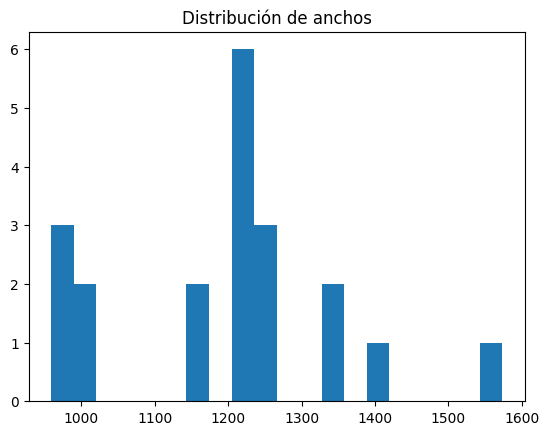

In [45]:
plt.figure()
plt.hist(df["width"], bins=20)
plt.title("Distribución de anchos")
plt.show()

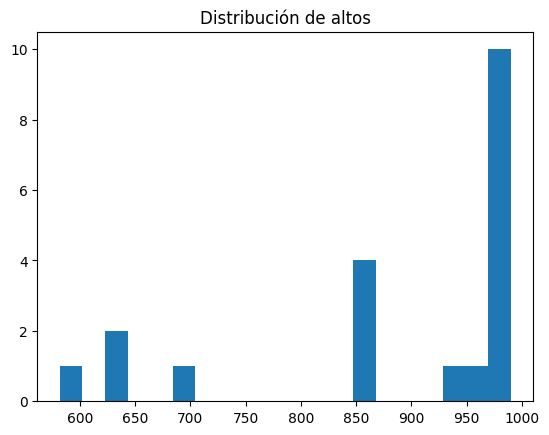

In [46]:
plt.figure()
plt.hist(df["height"], bins=20)
plt.title("Distribución de altos")
plt.show()

## Estadisticas de tamaño de archivo

In [47]:
print("Tamaño promedio (KB):", df["size_kb"].mean())
print("Tamaño mínimo (KB):", df["size_kb"].min())
print("Tamaño máximo (KB):", df["size_kb"].max())

Tamaño promedio (KB): 640.752685546875
Tamaño mínimo (KB): 250.6806640625
Tamaño máximo (KB): 922.9765625


## Visualización de ejemplos por clase

Total imágenes: 20

Clases únicas: <StringArray>
['Normal', 'HH']
Length: 2, dtype: str

Imágenes por clase:
class
HH        15
Normal     5
Name: count, dtype: int64


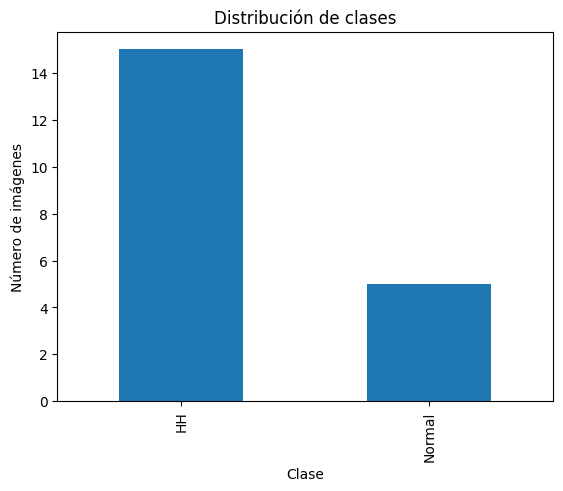

FileNotFoundError: [Errno 2] No such file or directory: 'data/images/Normal4.png'

<Figure size 1500x300 with 0 Axes>

In [ ]:
print("Total imágenes:", len(df))
print("\nClases únicas:", df["class"].unique())

print("\nImágenes por clase:")
print(df["class"].value_counts())

plt.figure()
df["class"].value_counts().plot(kind="bar")
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Número de imágenes")
plt.show()


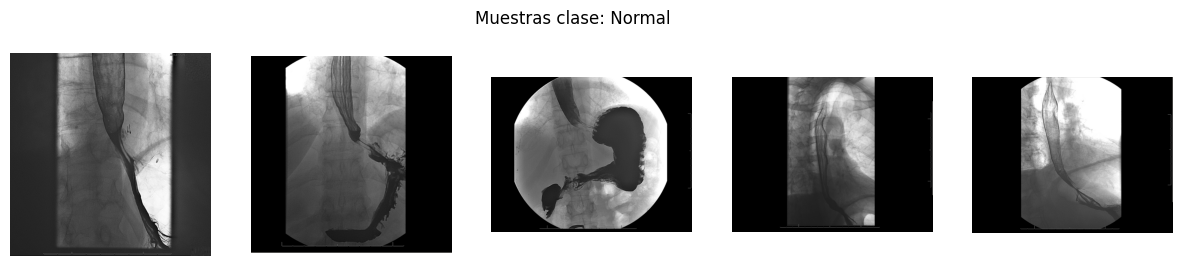

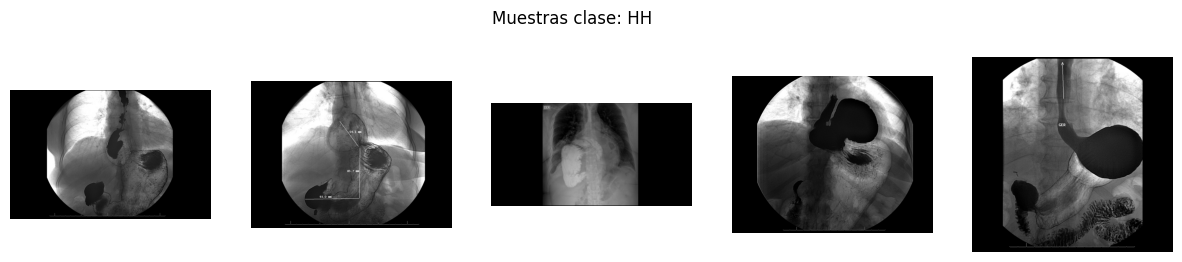

In [57]:
def show_samples(label, n=5):
    sample_paths = df[df["class"] == label]["image_path"].sample(min(n, len(df)))
    
    plt.figure(figsize=(15,3))
    for i, path in enumerate(sample_paths):
        img = Image.open("../" + path)
        plt.subplot(1, len(sample_paths), i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Muestras clase: {label}")
    plt.show()

for label in df["class"].unique():
    show_samples(label)

## Verificación de canales (RGB vs Grayscale)

In [54]:
print("Distribución de canales:")
print(df["channels"].value_counts())

Distribución de canales:
channels
4    19
3     1
Name: count, dtype: int64


## Análisis básico de intensidad (brillo)

In [60]:
def compute_mean_intensity(path):
    img = Image.open("../" + path).convert("L")
    arr = np.array(img)
    return arr.mean()

df["mean_intensity"] = df["image_path"].apply(compute_mean_intensity)

print(df["mean_intensity"].describe())

count    20.000000
mean     64.277374
std      14.280481
min      43.455688
25%      53.704210
50%      60.807839
75%      73.764588
max      92.208241
Name: mean_intensity, dtype: float64


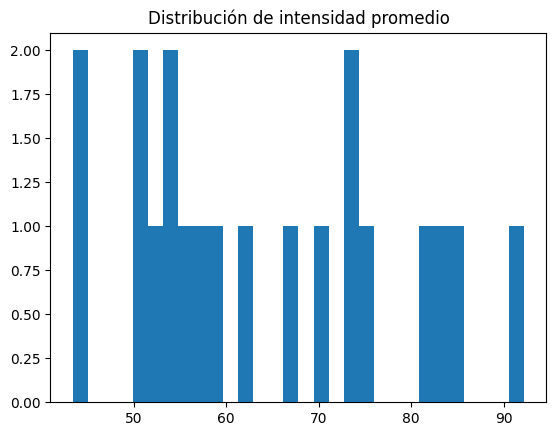

In [61]:
plt.figure()
plt.hist(df["mean_intensity"], bins=30)
plt.title("Distribución de intensidad promedio")
plt.show()

## Detección básica de imágenes atípicas

In [62]:
low_threshold = df["mean_intensity"].quantile(0.05)
high_threshold = df["mean_intensity"].quantile(0.95)

outliers = df[(df["mean_intensity"] < low_threshold) | 
              (df["mean_intensity"] > high_threshold)]

print("Posibles imágenes atípicas:", len(outliers))

Posibles imágenes atípicas: 2


## Division del dataset

In [70]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df["class"],
    random_state=42
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["class"],
    random_state=42
)

print("Train:", len(train_df))
print("Validation:", len(val_df))
print("Test:", len(test_df))

ValueError: The least populated classes in y have only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2. Classes with too few members are: ['Normal']

In [ ]:
print("\nDistribución Train:")
print(train_df["label"].value_counts())

print("\nDistribución Validation:")
print(val_df["label"].value_counts())

print("\nDistribución Test:")
print(test_df["label"].value_counts())

## Guardar CSV estructurado

In [ ]:
train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)